# Salary Estimation | K-NEAREST NEIGHBOUR model

In [1]:
import pandas as pd 
import numpy as np #to perform array

In [2]:
dataset = pd.read_csv('salary.csv')

In [3]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


# *Mapping Salary Data to Binary Value*

In [5]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


In [6]:
X = dataset.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [7]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

# *Splitting Dataset into Train & Test*

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# *Feature Scaling*

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

# *Finding the Best K-Value*

Text(0, 0.5, 'Mean Error')

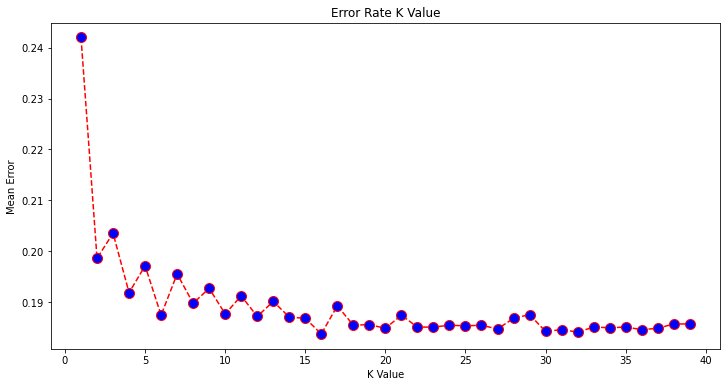

In [10]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# *Training*

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 16, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

# *Predicting, wheather new customer with Age & Salary will Buy or Not*

In [17]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Customer might not got  Salary above 50K")

Enter New Employee's Age: 60
Enter New Employee's Education: 9
Enter New Employee's Captital Gain: 0
Enter New Employee's Hour's Per week: 20
[0]
Customer might not got  Salary above 50K


# *Prediction for all Test Data*

In [18]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# *Evaluating Model - CONFUSION MATRIX*

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[5882  311]
 [1185  763]]
Accuracy of the Model: 81.62387913032796%
